In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3248.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2803.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_650.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2060.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_559.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3273.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_124.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_1849.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_139.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2137.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2438.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_553.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2661.jpg
/kaggle/input/face-mask-dataset/data/without_mask/without_mask_966.jp

# **Step 1: Install Required Libraries**

In [2]:
pip install tensorflow keras opencv-python numpy matplotlib imutils scikit-learn


Note: you may need to restart the kernel to use updated packages.


# Step 2: Import Required Libraries

In [3]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


# Step 3: Load and Preprocess Dataset

In [4]:
# Set dataset path
dataset_path = "/kaggle/input/face-mask-dataset/data" # Change this to your actual dataset path

# Define categories
categories = ["with_mask", "without_mask"]
IMG_SIZE = 100  # Resize all images to 100x100 pixels

# Lists to store images and labels
data = []
labels = []

# Load images
for category in categories:
    path = os.path.join(dataset_path, category)
    label = categories.index(category)  # 0 for "with_mask", 1 for "without_mask"

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        try:
            image = cv2.imread(img_path)  # Read image
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize image
            data.append(image)
            labels.append(label)
        except Exception as e:
            print(f"Error loading image: {img}")

# Convert lists to NumPy arrays
data = np.array(data) / 255.0  # Normalize images (scale pixel values to 0-1)
labels = np.array(labels)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 6042, Testing samples: 1511


#  Step 4: Build a CNN Model

In [5]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Output layer (2 classes)
])

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,732,034 (6.61 MB)

 Trainable params: 1,732,034 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

# Step 5: Train the Model

In [6]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save trained model
model.save("mask_detector_model.h5")


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 61s 313ms/step - accuracy: 0.7537 - loss: 0.5031 - val_accuracy: 0.8465 - val_loss: 0.3699
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 80s 304ms/step - accuracy: 0.8984 - loss: 0.2648 - val_accuracy: 0.9126 - val_loss: 0.2126
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 59s 311ms/step - accuracy: 0.9198 - loss: 0.1976 - val_accuracy: 0.9285 - val_loss: 0.1692
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 58s 307ms/step - accuracy: 0.9439 - loss: 0.1527 - val_accuracy: 0.9563 - val_loss: 0.1327
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 58s 309ms/step - accuracy: 0.9549 - loss: 0.1314 - val_accuracy: 0.9530 - val_loss: 0.1301
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 82s 307ms/step - accuracy: 0.9544 - loss: 0.1203 - val_accuracy: 0.9550 - val_loss: 0.1359
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 82s 308ms/step - accuracy: 0.9729 - loss: 0.0782 - val_accuracy: 0.9471 - val_loss: 0.1278
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 58s 307ms/step - accuracy: 0.9708 - loss: 0

# Step 6: Evaluate the Model

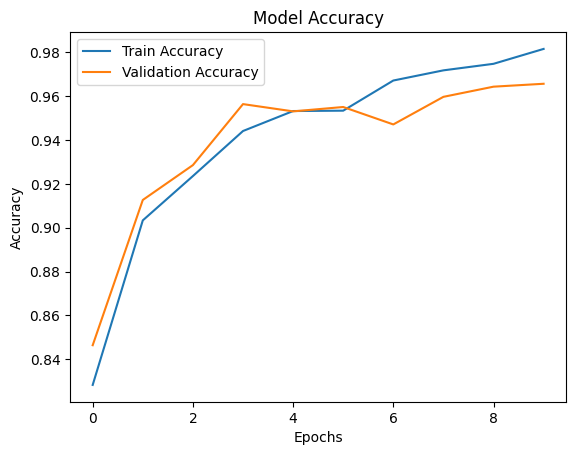

In [7]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


#  Step 7: Real-Time Face Mask Detection with OpenCV

In [8]:
# Load trained model
model = tf.keras.models.load_model("mask_detector_model.h5")

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert frame to grayscale
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face = frame[y:y + h, x:x + w]
        face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))
        face = np.expand_dims(face, axis=0) / 255.0  # Normalize

        prediction = model.predict(face)
        label = "Mask" if prediction[0][0] > prediction[0][1] else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    cv2.imshow("Face Mask Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


In [9]:
def predict_mask(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (100, 100))  # Resize to match model input shape
    image = image / 255.0  # Normalize (convert pixels to 0-1 range)
    
    # Reshape for the model (batch size of 1)
    image = np.expand_dims(image, axis=0)  
    
    # Make a prediction
    prediction = model.predict(image)
    
    # Interpret the result
    class_labels = ["With Mask", "Without Mask"]
    predicted_class = np.argmax(prediction)  # Get class index
    confidence = np.max(prediction) * 100  # Get confidence level
    
    # Display the image and prediction
    plt.imshow(cv2.imread(image_path)[:, :, ::-1])  # Convert BGR to RGB for display
    plt.axis("off")
    plt.title(f"Prediction: {class_labels[predicted_class]} ({confidence:.2f}%)")
    plt.show()
    
    return class_labels[predicted_class], confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


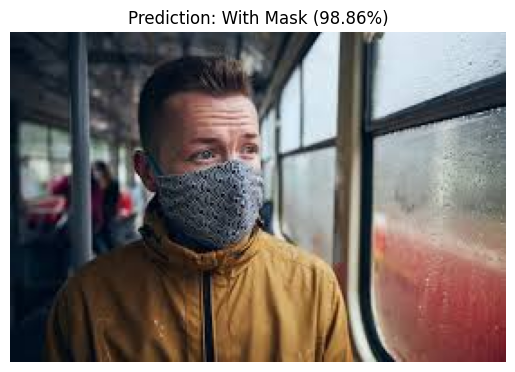

Prediction: With Mask with confidence 98.86%


In [10]:
image_path = "/kaggle/input/demo-2/download (1).jpeg"  # Change this to your image filename
result, confidence = predict_mask(image_path)
print(f"Prediction: {result} with confidence {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


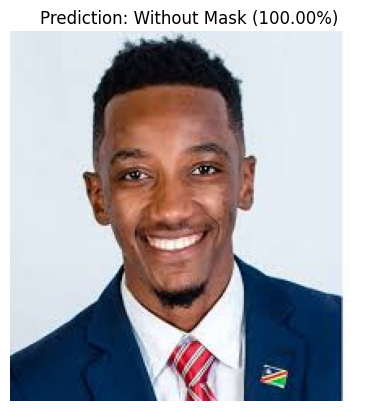

Prediction: Without Mask with confidence 100.00%


In [11]:
image_path = "/kaggle/input/demo-2/download (2).jpeg"  # Change this to your image filename
result, confidence = predict_mask(image_path)
print(f"Prediction: {result} with confidence {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


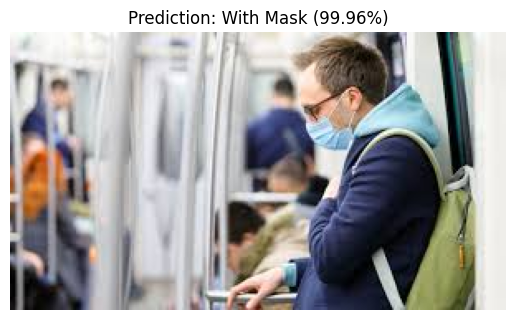

Prediction: With Mask with confidence 99.96%


In [12]:
image_path = "/kaggle/input/demo-2/download (3).jpeg"  # Change this to your image filename
result, confidence = predict_mask(image_path)
print(f"Prediction: {result} with confidence {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


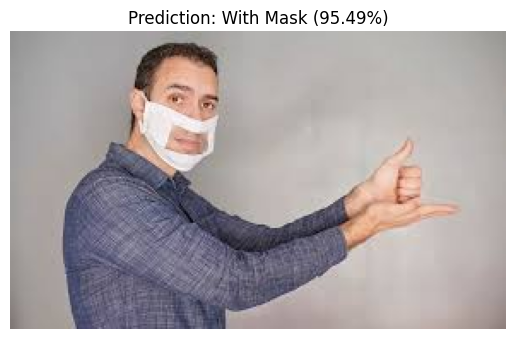

Prediction: With Mask with confidence 95.49%


In [13]:
image_path = "/kaggle/input/demo-2/download (4).jpeg"  # Change this to your image filename
result, confidence = predict_mask(image_path)
print(f"Prediction: {result} with confidence {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


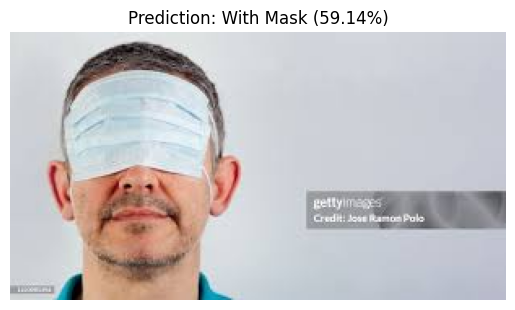

Prediction: With Mask with confidence 59.14%


In [14]:
image_path = "/kaggle/input/demo-3/images.jpeg"  # Change this to your image filename
result, confidence = predict_mask(image_path)
print(f"Prediction: {result} with confidence {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


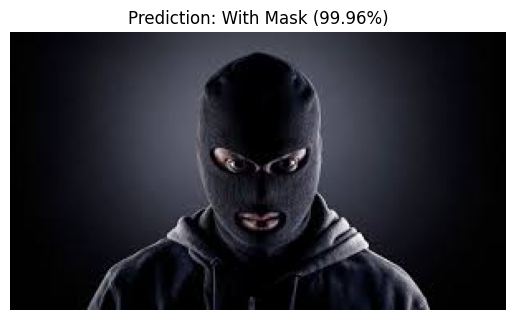

Prediction: With Mask with confidence 99.96%


In [15]:
image_path = "/kaggle/input/demo-3/images (5).jpeg"  # Change this to your image filename
result, confidence = predict_mask(image_path)
print(f"Prediction: {result} with confidence {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


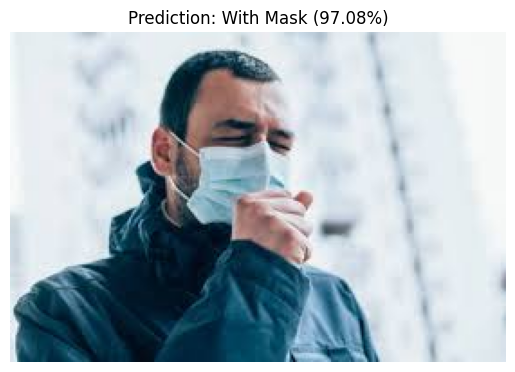

Prediction: With Mask with confidence 97.08%


In [16]:
image_path = "/kaggle/input/demo-3/images (1).jpeg"  # Change this to your image filename
result, confidence = predict_mask(image_path)
print(f"Prediction: {result} with confidence {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


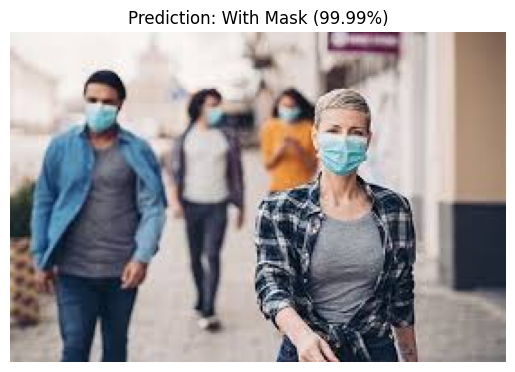

Prediction: With Mask with confidence 99.99%


In [17]:
image_path = "/kaggle/input/demo-3/images (2).jpeg"  # Change this to your image filename
result, confidence = predict_mask(image_path)
print(f"Prediction: {result} with confidence {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


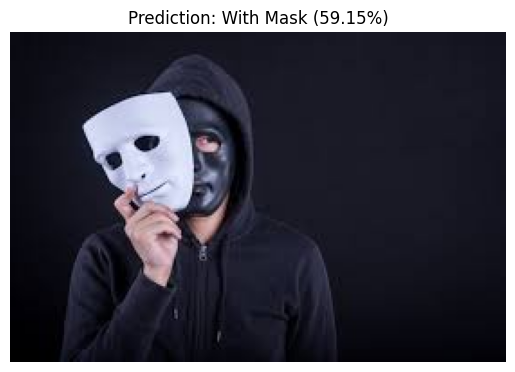

Prediction: With Mask with confidence 59.15%


In [18]:
image_path = "/kaggle/input/demo-3/images (3).jpeg"  # Change this to your image filename
result, confidence = predict_mask(image_path)
print(f"Prediction: {result} with confidence {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


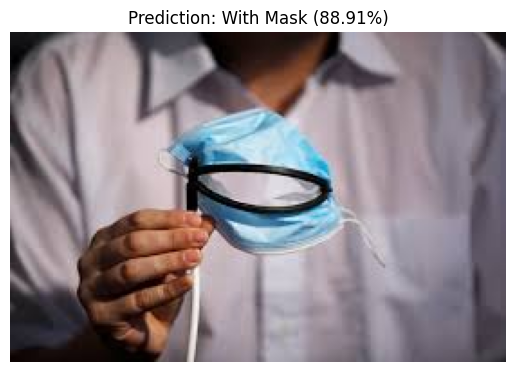

Prediction: With Mask with confidence 88.91%


In [19]:
image_path = "/kaggle/input/demo-3/images (4).jpeg"  # Change this to your image filename
result, confidence = predict_mask(image_path)
print(f"Prediction: {result} with confidence {confidence:.2f}%")